In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time

from optimizer import *
from LookAhead import LookAheadOpt
from methods import gradient

In [2]:
def quad_10(x):
    return np.sum(x**2)

def rosen(x, a=1, b=5):
    n = len(x)
    #return np.sum((a - x[:-1])**2 + b*(x[1:]- x[:-1]**2)**2)
    return sum((a - x[i])**2 + b*(x[i+1]- x[i]**2)**2 for i in range(n-1))

In [3]:
def process(opt, func, x, k=2000):
    p = np.zeros((k+1, 10))
    p[0] = x
    
    for i in range(k):
        x = opt.step(func, x)
        p[i+1] = x
    
    return p

def evaluate(optimizer, func, num_x, N=100, tol=1e-10):
    data = {'abs_err':np.zeros(N), 'abs_err_func':np.zeros(N),
           'num_func_eval': np.zeros(N), 'time':np.zeros(N)}
    
    for i in range(N):
        
        x = np.zeros(num_x)
        for k in range(num_x):
            sign = np.random.choice([1, -1])
            y = np.random.random() * 4 - 2
            x[k] = sign * np.exp(y)
        
        diff = np.Inf
        diffval = np.Inf
        n = 0
        t = 0
        
        while diffval > tol:
            tict = time.time()
            nx = optimizer.step(func, x)
            elapsed_time = time.time() - tict
            diff = np.linalg.norm(nx-x)
            diffval = np.abs(func(nx)-func(x))
            n += 1
            t += elapsed_time
            
            x = nx
        data['abs_err'][i] = diff
        data['abs_err_func'][i] = diffval
        data['num_func_eval'][i] = n
        data['time'][i] = t
        
    
    return x, data

In [4]:
def h(x):
    return np.array([np.sum(x) - 2])

In [5]:
adam = AdamOpt(10)
momentum = MomemtumOpt(10)
gradient_descent = gradient_descent_methods()
conjugate_gradient = conjugate_gradient_methods(10)
augmented_lagrange = AugumentedLagrangeOpt(h, 1)

lookahead_adam = LookAheadOpt(adam)
lookahead_mom = LookAheadOpt(momentum)
lookahead_gd = LookAheadOpt(gradient_descent)
lookahead_cg = LookAheadOpt(conjugate_gradient)
lookahead_al = LookAheadOpt(augmented_lagrange)

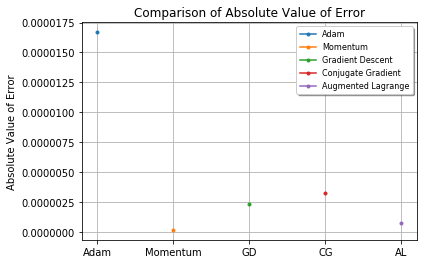

In [6]:
x_adam, adam_data = evaluate(lookahead_adam, rosen, 10, N=5)
x_mom, mom_data = evaluate(lookahead_mom, rosen, 10, N=5)
x_gd, gd_data = evaluate(lookahead_gd, rosen, 10, N=5)
x_cg, cg_data = evaluate(lookahead_cg, rosen, 10, N=5)
x_aug, aug_data = evaluate(lookahead_al, rosen, 10, N=5)

fig, ax = plt.subplots()
ax.plot(["Adam"], np.mean(adam_data['abs_err']), '.-', label = 'Adam')
ax.plot(["Momentum"], np.mean(mom_data['abs_err']), '.-', label = 'Momentum')
ax.plot(["GD"], np.mean(gd_data['abs_err']), '.-', label = 'Gradient Descent')
ax.plot(["CG"], np.mean(cg_data['abs_err']), '.-', label = 'Conjugate Gradient')
ax.plot(["AL"], np.mean(aug_data['abs_err']), '.-', label = 'Augmented Lagrange')

legend = ax.legend(loc='upper right', shadow=True, prop={'size': 8})

ax.set(ylabel='Absolute Value of Error',
       title='Comparison of Absolute Value of Error')
ax.grid()
plt.show()


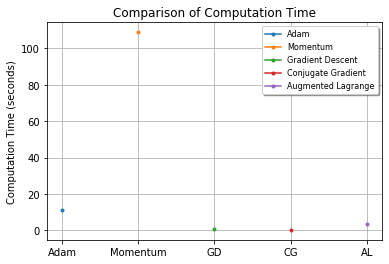

In [7]:
fig, ax = plt.subplots()
ax.plot(["Adam"], np.mean(adam_data['time']), '.-', label = 'Adam')
ax.plot(["Momentum"], np.mean(mom_data['time']), '.-', label = 'Momentum')
ax.plot(["GD"], np.mean(gd_data['time']), '.-', label = 'Gradient Descent')
ax.plot(["CG"], np.mean(cg_data['time']), '.-', label = 'Conjugate Gradient')
ax.plot(["AL"], np.mean(aug_data['time']), '.-', label = 'Augmented Lagrange')

legend = ax.legend(loc='upper right', shadow=True, prop={'size': 8})

ax.set(ylabel='Computation Time (seconds)',
       title='Comparison of Computation Time')
ax.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(["Adam"], np.mean(adam_data['num_func_eval']), '.-', label = 'Adam')
ax.plot(["Momentum"], np.mean(mom_data['num_func_eval']), '.-', label = 'Momentum')
ax.plot(["GD"], np.mean(gd_data['num_func_eval']), '.-', label = 'Gradient Descent')
ax.plot(["CG"], np.mean(cg_data['num_func_eval']), '.-', label = 'Conjugate Gradient')
ax.plot(["AL"], np.mean(aug_data['num_func_eval']), '.-', label = 'Augmented Lagrange')

legend = ax.legend(loc='upper right', shadow=True, prop={'size': 8})

ax.set(ylabel='Number of Function Calls',
       title='Comparison of Number of Function Calls')
ax.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots()

xBase_gd, gdBase_data = evaluate(gradient_descent, rosen, 10, N=5)
xBase_cg, cgBase_data = evaluate(conjugate_gradient, rosen, 10, N=5)
xBase_aug, augBase_data = evaluate(augmented_lagrange, rosen, 10, N=5)

ax.plot(["GD"], np.mean(gdBase_data['time']), '.-', label = 'GD - Base')
ax.plot(["GD LA"], np.mean(gd_data['time']), '.-', label = 'GD with LA')
ax.plot(["CG"], np.mean(cgBase_data['time']), '.-', label = 'CG - Base')
ax.plot(["CG LA"], np.mean(cg_data['time']), '.-', label = 'CG with LA')
ax.plot(["AL"], np.mean(augBase_data['time']), '.-', label = 'AL - Base')
ax.plot(["AL LA"], np.mean(aug_data['time']), '.-', label = 'AL with LA')

legend = ax.legend(loc='upper left', shadow=True, prop={'size': 8})

ax.set(ylabel='Computation Time (seconds)',
       title='Comparison of Relative Computation Time')
ax.grid()
plt.show()

In [ ]:
num_x = 10
x = np.zeros(num_x)
for k in range(num_x):
    sign = np.random.choice([1, -1])
    y = np.random.random() * 4 - 2
    x[k] = sign * np.exp(y)

In [ ]:
lam = np.ones(4)
k = np.ones(4)

In [ ]:
np.matmul(lam, 2*k)

In [ ]:
from methods import gradient

In [ ]:
def f(x):
    return x[0]**2 - x[1]*x[0]

In [ ]:
gradient(f, [1.0,1.0])

In [ ]:
def f(x):
    return x[0]**2

In [ ]:
gradient(f, [1])

In [ ]:
np.zeros(4)